# 01. Library Load

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 02. Data Load

In [4]:
train =pd.read_csv(r'D:\kaggle\01. bike-sharing-demand\data/train.csv')
test =pd.read_csv(r'D:\kaggle\01. bike-sharing-demand\data/test.csv')
sub =pd.read_csv(r'D:\kaggle\01. bike-sharing-demand\data/sampleSubmission.csv')

# 03. Data 결합하기

   - 똑같은 작업을 반복하지 않기 위해, train과 test 결합.
   - 단점 : train, test의 분포가 다르다면 오히려 좋지 않은 영향을 끼칠 수 있음. -> 우리 모델이 실수 할 수 있는 부분을 찾아줘야 함.

In [5]:
all_data=pd.concat([train,test])
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


### columns 설명
- datetime : hourly date + timestamp
- season : 1=spring, 2=summer, 3=fall, 4=winter
- holiday : whether the day is considered a holiday(휴일 : 1, 휴일 X : 0)
- workingday : whether the day is neither a weekend nor holiday(주말, 휴일 아니면 : 1, 주말, 휴일 : 0)
- weather : 1 : Clear, Few clouds, Partly cloudy, Partly cloudy  
              2 : Mist + Cloudy, Mist + Broken clouds, Mist+Few clouds, Mist  
              3 : Light Snow, Light RAin + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
              4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- temp : temperature in Celsius  
- atemp : "feels like" temperature in Celsius  
- humidity : relative humidity  
- windspeed : wind speed  
- casual : number of non-registered user rentals initiated  
- registered : number of registered user rentals initiated  
- count : number of total rentals  

# 04. EDA

## 01 : 날짜 형태로 변환.

In [6]:
all_data['datetime'] = all_data['datetime'].astype('datetime64')
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


## 02. 날짜 데이터를 통해서 년도, 월, 시간 추가.

In [7]:
# 시간, 년 추가.
all_data['year'] = all_data['datetime'].dt.year
all_data['hour'] = all_data['datetime'].dt.hour
all_data['month'] = all_data['datetime'].dt.month

In [8]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,4,1


In [9]:
all_data['holiday'].value_counts().reset_index()
# 대부분 휴일이 아니고, 휴일은 전체 500개의 행 정도 된다.

,index,holiday
0,0,16879
1,1,500


In [10]:
all_data['workingday'].value_counts().reset_index()
# 주말, 휴일 제외 5514개의 행 정도 된다.

,index,workingday
0,1,11865
1,0,5514


## 03. 그래프 그리기

### 03-1 year별 bke rental 수

In [11]:
all_data['year'].unique()

array([2011, 2012], dtype=int64)

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

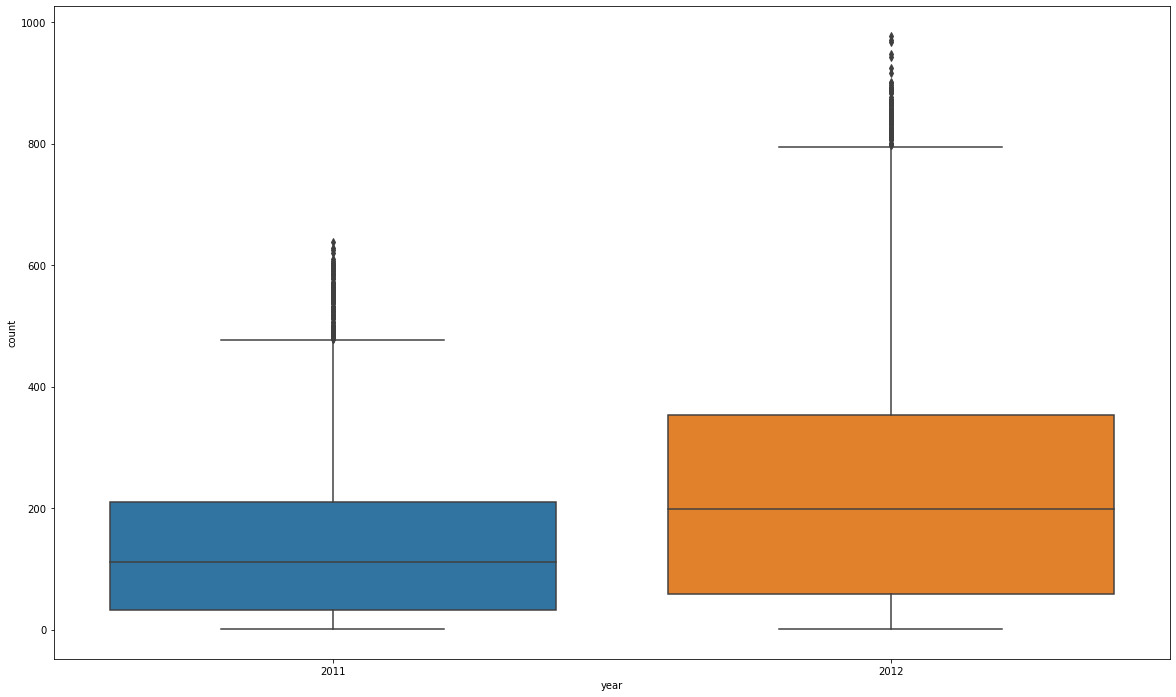

In [12]:
# 년도별 bike rental 수
plt.figure(figsize=(20,12))
sns.boxplot(all_data['year'],all_data['count'])

In [13]:
# 2012년에 2011년보다 자전거를 많이 대여한 것을 알 수 있다.

### 03-2 시간별 bike rental 수

In [14]:
all_data['hour'].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hour, dtype: int64

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

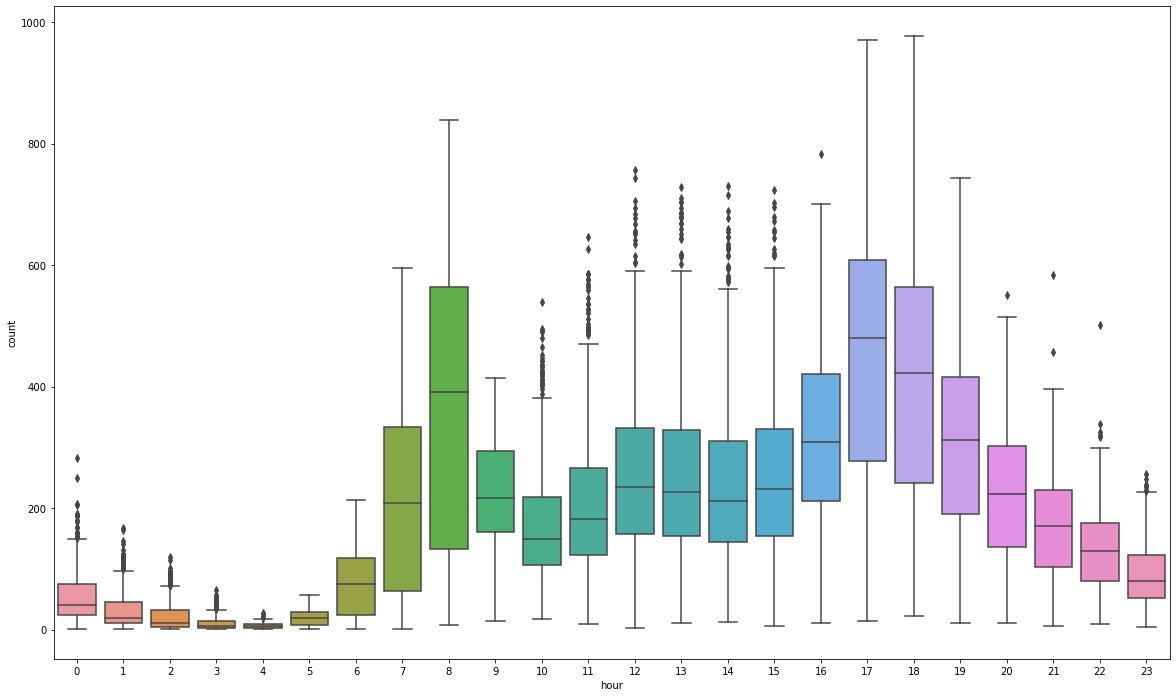

In [15]:
plt.figure(figsize=(20,12))
sns.boxplot(all_data['hour'],all_data['count'])

In [16]:
# 시간대 별도 자전거 대여한 수 차이가 많이나는 것을 확인할 수 있다.
# 새벽에는 많이 타지 않고, 출근길 8, 퇴근길 17,18에 많이 타는 것을 알 수 있다.

### 03-3 windspeed 분포 파악

In [17]:
all_data['windspeed'].describe()

count    17379.000000
mean        12.736540
std          8.196795
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

(array([2.180e+03, 6.475e+03, 4.465e+03, 2.458e+03, 1.137e+03, 4.340e+02,
        1.670e+02, 4.800e+01, 9.000e+00, 6.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

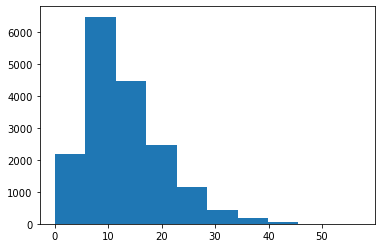

In [18]:
plt.hist(all_data['windspeed'])

In [19]:
# 대부분의 값이 20 이내의 값들로 분포합니다.

### 03-04 계절별 bike rental 수

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

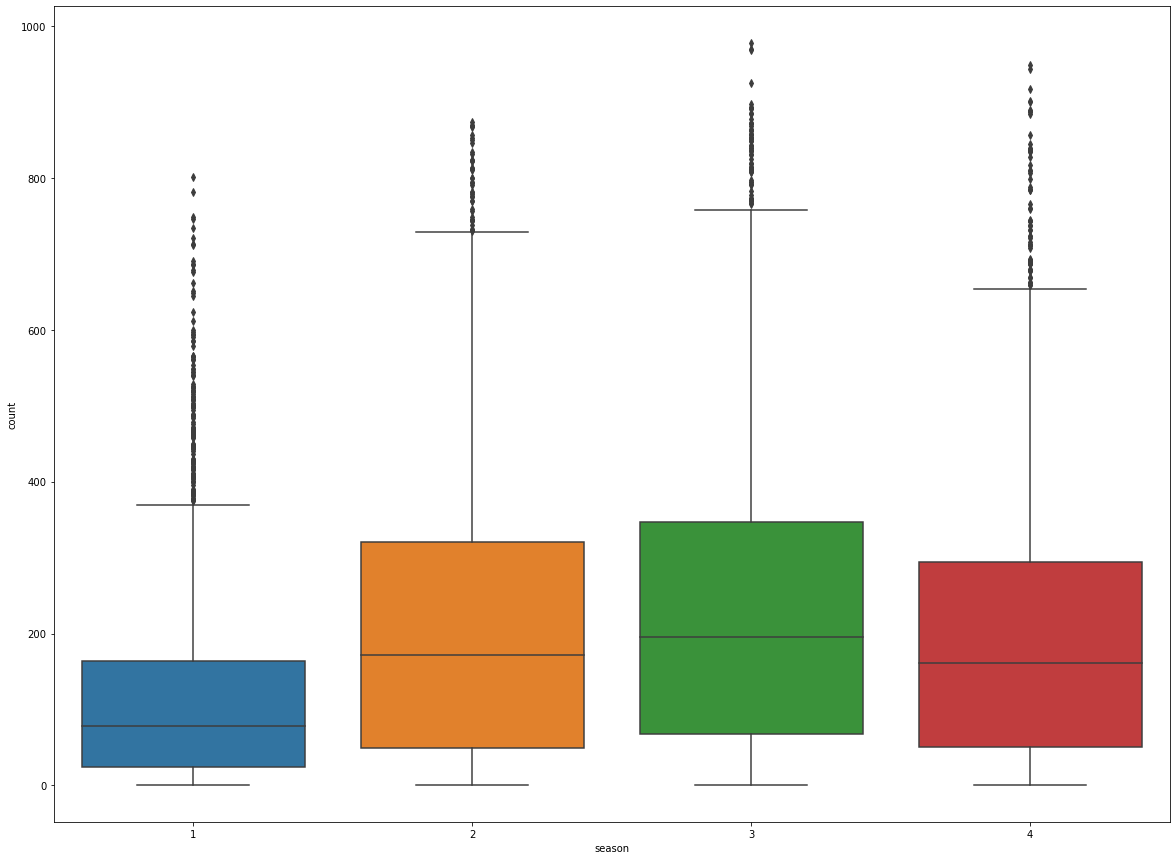

In [20]:
# 계절은 어떨까?
plt.figure(figsize=(20,15))
sns.boxplot(all_data['season'],all_data['count'])

In [21]:
# 계절별로 count 수 차이가 조금씩 있다고 볼 수 있습니다.

### 03-5 day별로 bike rental 수

In [22]:
# day는 괜찮을까?
all_data['day'] = all_data['datetime'].dt.day

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

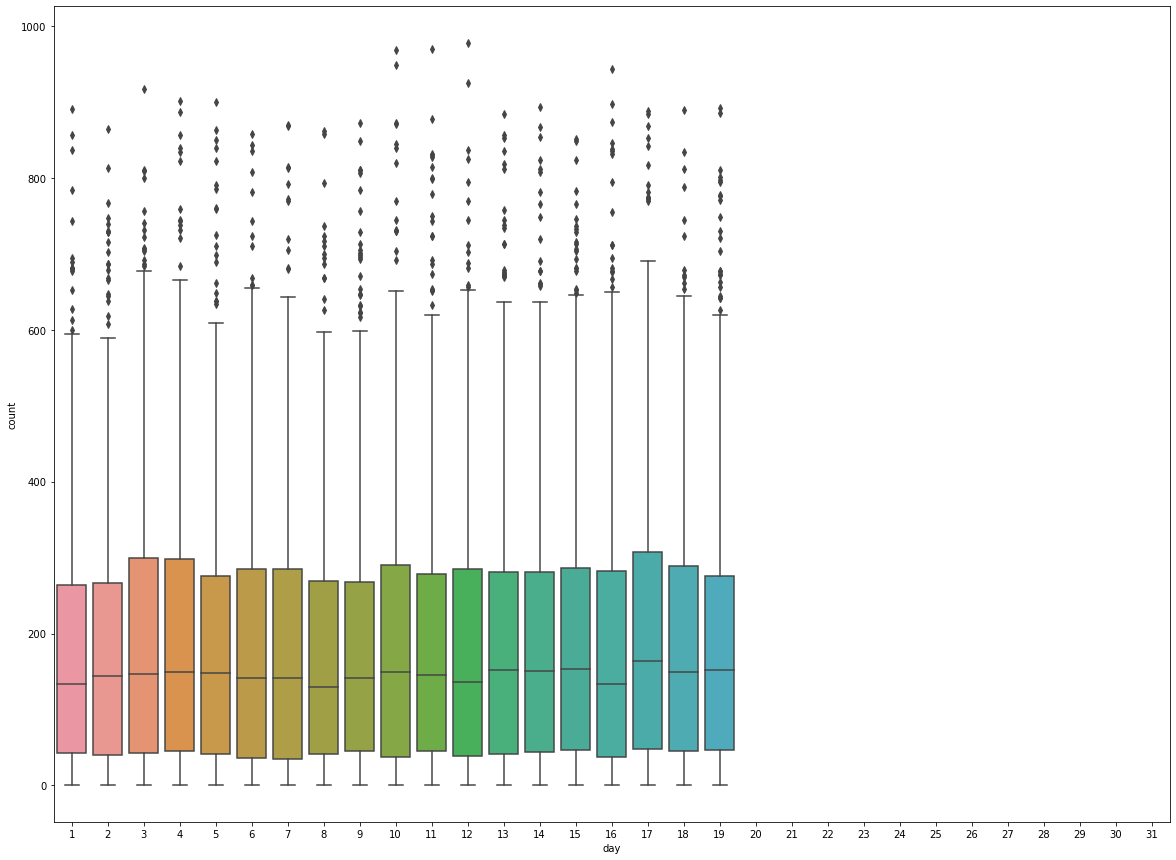

In [23]:
plt.figure(figsize=(20,15))
sns.boxplot(all_data['day'],all_data['count'])
# 큰 차이는 없어 좋은 feature는 아닌 것 같다.
# 1:19만 추출이 가능한가?

In [24]:
# 일별로 봤을 때는 큰 차이는 없고, 20~31일 같은 경우 데이터가 없기 때문에 그래프에 표시되지 않습니다.

### 03-6 holiday별 bike rental 수

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

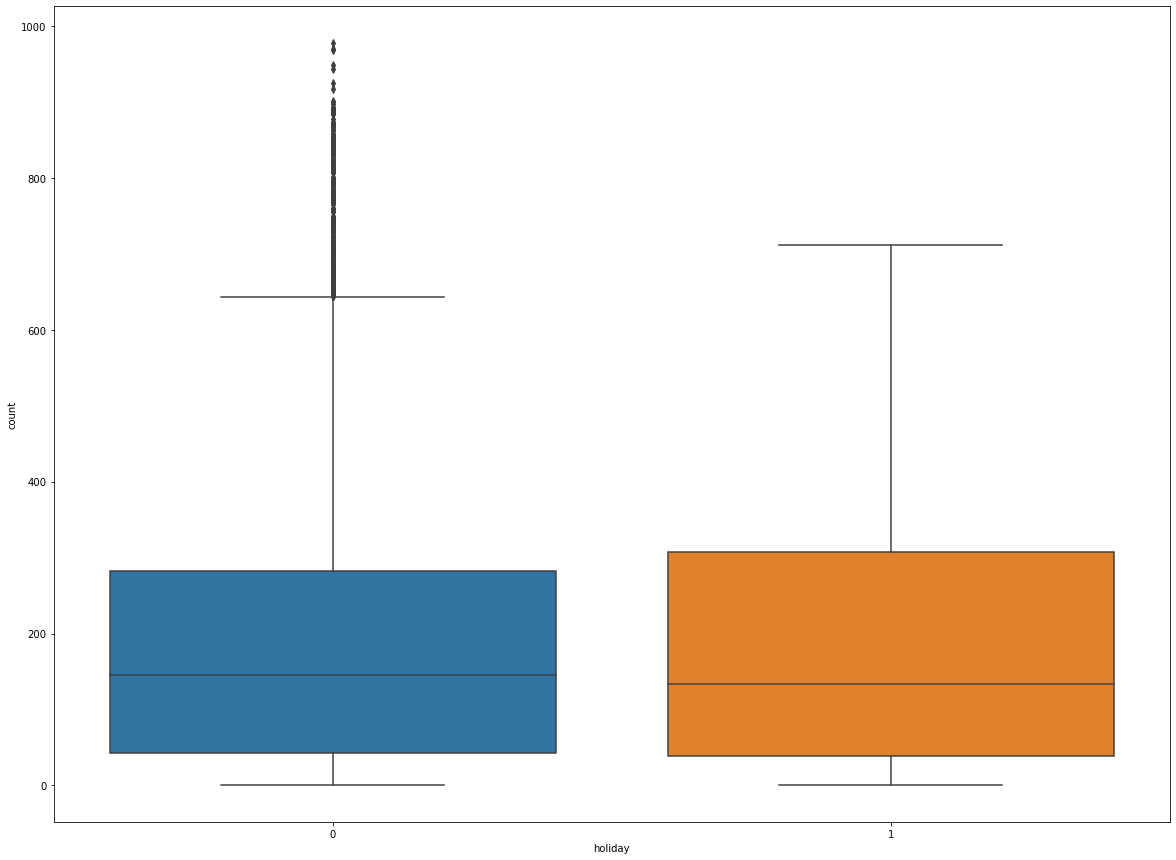

In [25]:
plt.figure(figsize=(20,15))
sns.boxplot(all_data['holiday'],all_data['count'])

In [26]:
# 전체적인 분포는 차이가 없어 보이지만, holiday가 0일 때 outlier가 굉장히 많다.

### 03-7 workingday별 bike rental 수

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

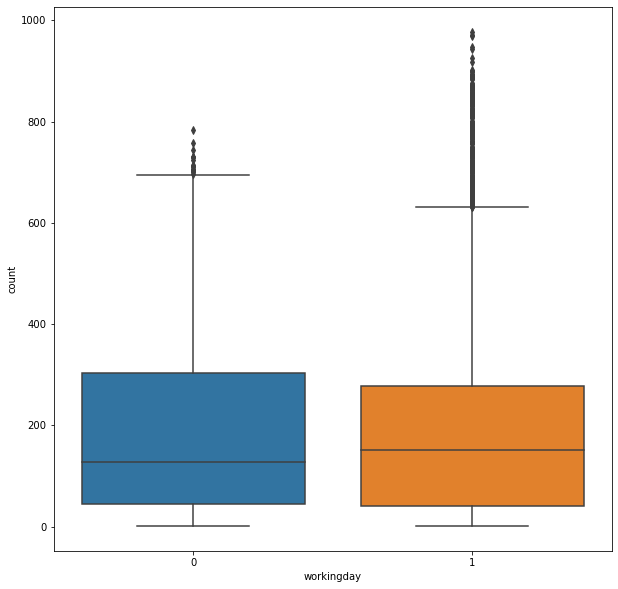

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(all_data['workingday'],all_data['count'])

In [28]:
# workingday 별도 큰 차이가 없는 것을 확인할 수 있습니다.

### 03-8 weekday 파생변수 만들기

In [29]:
all_data['weekday'] = all_data['datetime'].dt.weekday
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month,day,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011,4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,19,12,31,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,20,12,31,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,21,12,31,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012,22,12,31,0


C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

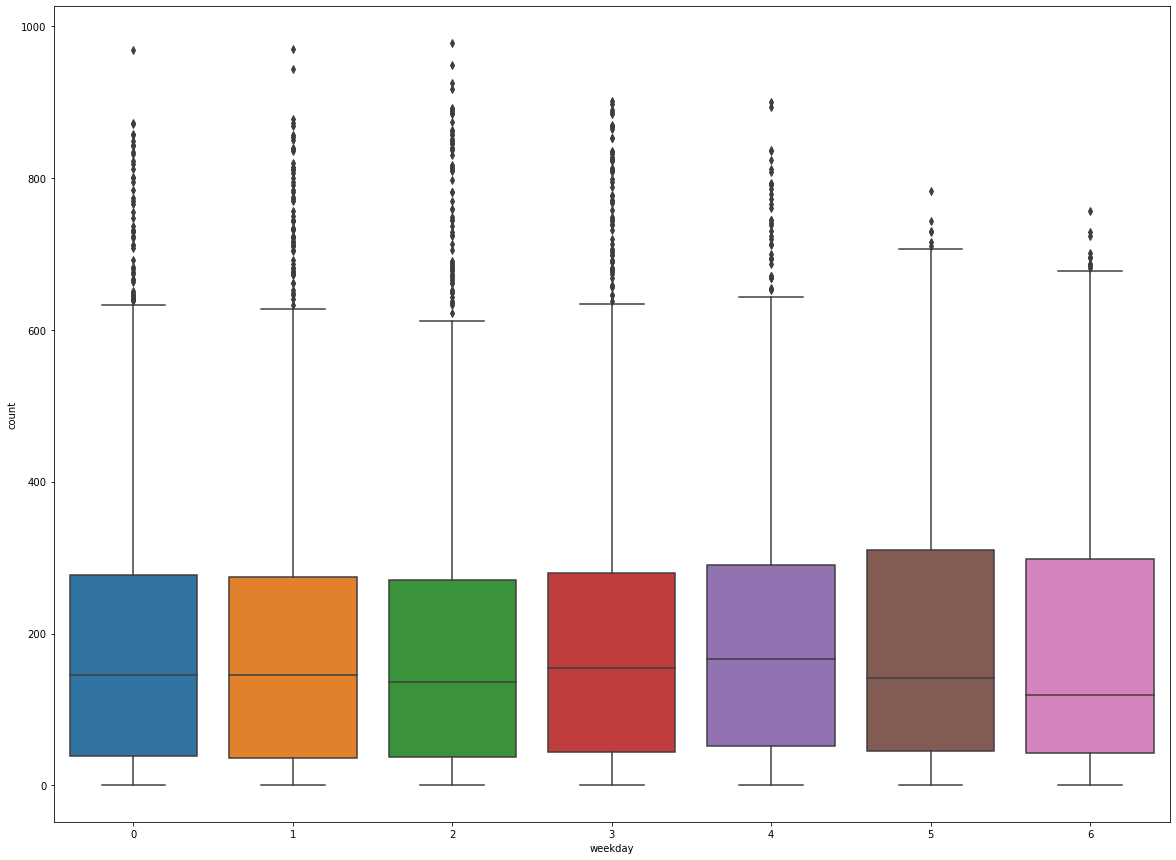

In [30]:
# 요일은 상관 있을까?
plt.figure(figsize=(20,15))
sns.boxplot(all_data['weekday'],all_data['count'])

# 큰 차이는 없어보인다.

In [31]:
# 차이가 조금 있는 것을 확인할 수 있고, 6(일요일) 같은 경우 상대적으로 다른 요일보다 낮은 것을 확인할 수 있습니다.

### 03-9 월별 bike rental 수

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

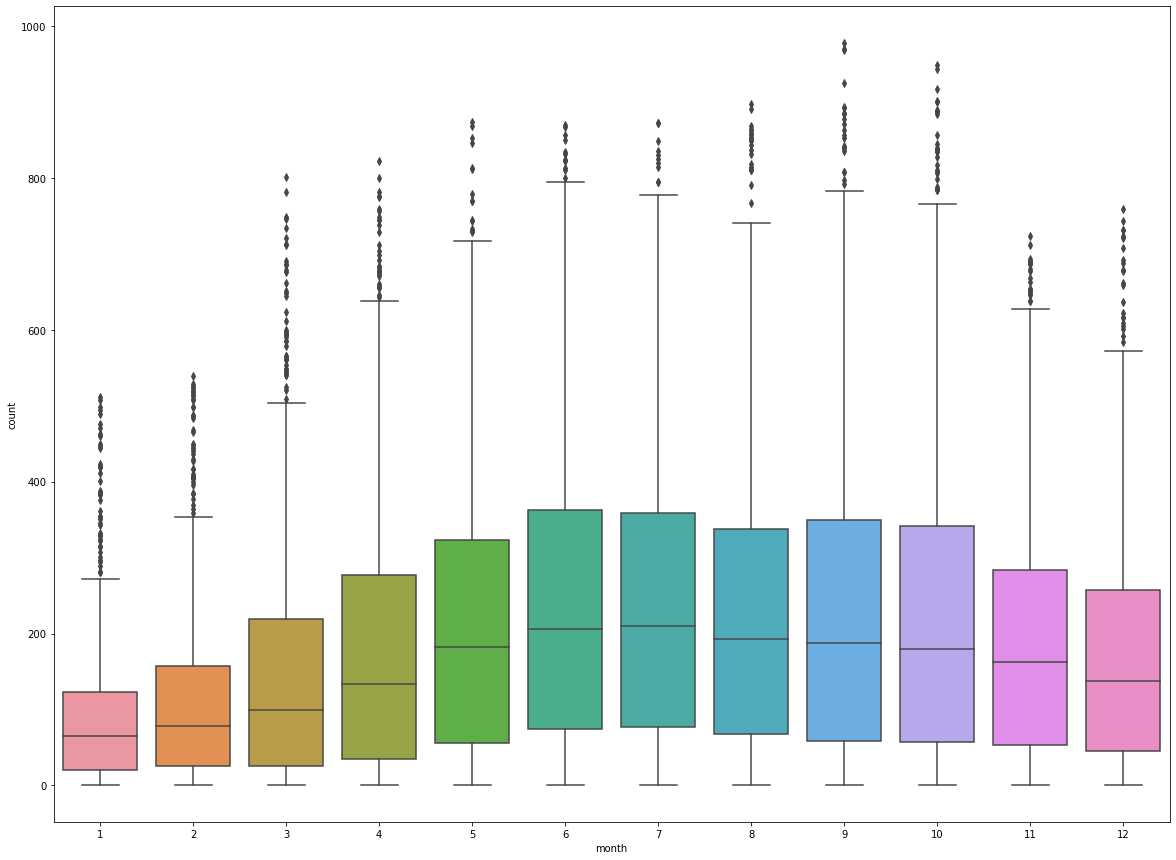

In [32]:
plt.figure(figsize=(20,15))
sns.boxplot(all_data['month'],all_data['count'])

In [33]:
#  평균적으로 5~10 큰 차이를 보여주지 않는다.

### 03-10 weather별 bike rental 수

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

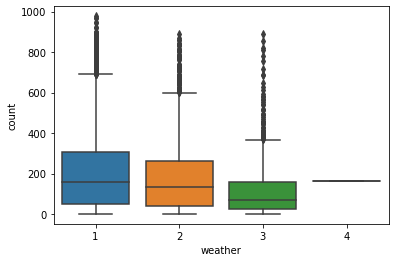

In [34]:
sns.boxplot(all_data['weather'],all_data['count'])

In [35]:
# all_data[all_data['weather']==4] = all_data[all_data['weather']==4].replace({'weather':4},{'weather':3})
# 데이터 분포가 많이 다른 것을 확인할 수 있으며, weather이 4인 경우에는 데이터가 매우 적은 것을 알 수 있습니다.

In [36]:
all_data['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [37]:
all_data[all_data['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month,day,weekday
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6.0,158.0,164.0,2012,18,1,9,0
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93,22.0028,NaN,NaN,NaN,2011,16,1,26,2
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,NaN,NaN,NaN,2012,1,1,21,5


### 03-11 분석에 필요한 데이터만 추출

In [38]:
all_data2=all_data.drop(['month','datetime','casual','registered','count','day'],axis=1)
all_data2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,19,0
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,20,0
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,21,0
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,22,0


### 03-12 target 변수의 분포 파악

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

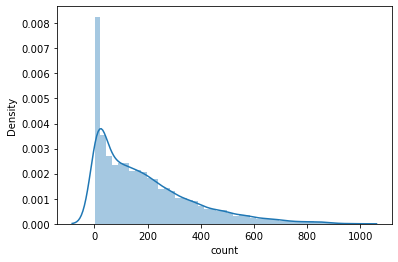

In [39]:
sns.distplot(train['count'])

- 값이 매우 0 쪽으로 치우쳐져 있는 것을 확인할 수 있다.
- 이런 경우 sqrt, log 등으로 변환 후 분석을 진행하는 것이 효율적이다.
- log를 취하면 좋은점
  - 분포 자체가 넓으면 튀는 값이 많음. -> y의 범위가 줄어들어서 튀는 값을 제어해준다.
  - 분포가 정규분포의 형태로 조금 더 변형되고, 굉장히 튀는 구간의 데이터가 많이 분포 안으로 속하게 된다.

C:\Users\Seokmin Kim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

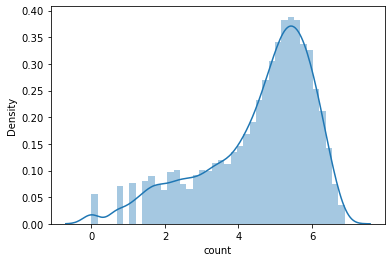

In [40]:
'''
y칼럼에만 log를 취하는 것.(tree 계열 모델)
outlier들을 모델이 파악을 합니다. -> test에서도 outlier가 있을 확률이 높습니다. -> 예측을 거의 하지 못합니다.
문제 : ex) test -> 100인데, train에 800~900이랑 패턴이 비슷하면 800~900으로 예측해버림.
'''
# log 취해주기.
sns.distplot(np.log(train['count']))

In [41]:
# 조금 더 분포가 정규분포의 형태로 띄게 되며, 튀는 값이 적어진 것을 확인할 수 있습니다.

## 04. Modeling

### 04-1 train, test 분리

In [42]:
train2=all_data2[:len(train)]
test2 = all_data2[len(train):]

In [43]:
# catboost : 범주형 데이터가 많을 경우 효율적인 boosting 계열의 모델.
# 처음으로 iterations(반복수) : 3000으로 설정,
# learing_rate(학습률) : 0.01로 설정.
# verbose: 500, 500번 배수로 분석 결과를 도출.

# 라이브러리
from catboost import CatBoostRegressor

# 모델 설정.
cat = CatBoostRegressor(learning_rate=0.01,random_state=42,iterations=3000,verbose=500)

# 모델 학습.
cat.fit(train2,np.log(train['count']))

# 모델 예측.
result = cat.predict(test2)

0:	learn: 1.4775578	total: 182ms	remaining: 9m 7s
500:	learn: 0.3897556	total: 1.36s	remaining: 6.79s
1000:	learn: 0.3270253	total: 2.52s	remaining: 5.04s
1500:	learn: 0.3082414	total: 3.69s	remaining: 3.69s
2000:	learn: 0.2967020	total: 4.84s	remaining: 2.42s
2500:	learn: 0.2866140	total: 5.96s	remaining: 1.19s
2999:	learn: 0.2783603	total: 7.11s	remaining: 0us


In [44]:
# all_data로 묶는 다면

In [45]:
# 이 대회에서는 데이터의 특징 때문에 train 월 초 중만 존재 -> test는 월말만 존재. 그래서 모델이 잘 적합하지 못한다.
# holiday. 월초, 월중에 들어간 공휴일과 월말의 공휴일은 다르다.(미국)

In [46]:
sub['count'] = np.exp(result)
sub

,datetime,count
0,2011-01-20 00:00:00,10.363107
1,2011-01-20 01:00:00,5.042761
2,2011-01-20 02:00:00,2.763199
3,2011-01-20 03:00:00,1.819383
4,2011-01-20 04:00:00,1.618440
...,...,...
6488,2012-12-31 19:00:00,215.555870
6489,2012-12-31 20:00:00,150.607205
6490,2012-12-31 21:00:00,111.085898
6491,2012-12-31 22:00:00,75.946711


In [47]:
# post processing.

#미국 현충일
sub.iloc[1258:1269, 1]= sub.iloc[1258:1269, 1]*0.5
sub.iloc[4492:4515, 1]= sub.iloc[4492:4515, 1]*0.5

#크리스마스 이브
sub.iloc[6308:6330, 1]= sub.iloc[6308:6330, 1]*0.5
sub.iloc[3041:3063, 1]= sub.iloc[3041:3063, 1]*0.5

#크리스마스
sub.iloc[6332:6354, 1]= sub.iloc[6332:6354, 1]*0.5
sub.iloc[3065:3087, 1]= sub.iloc[3065:3087, 1]*0.5

#추수감사절
sub.iloc[5992:6015, 1]= sub.iloc[5992:6015, 1]*0.5
sub.iloc[2771:2794, 1]= sub.iloc[2771:2794, 1]*0.5

In [48]:
sub.to_csv('sub.csv',index=False)

In [49]:
# private leaderboard 4등 위치